In [1]:
!pip install pandas
!pip install geopandas
!pip install rasterio
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
#Fire datasets
Fire_Alg_df=pd.read_csv(r'Datasets\viirs-jpss1_2024_Algeria.csv')
print(Fire_Alg_df.head())
Fire_Tun_df=pd.read_csv(r'Datasets\viirs-jpss1_2024_Tunisia.csv')
print(Fire_Tun_df.head())
#Combine datasets
Fire_df=pd.concat([Fire_Alg_df,Fire_Tun_df],ignore_index=True)
# Save the combined dataframe as a CSV file
Fire_df.to_csv("Datasets/Alg_Tun_Fire_dataset.csv", index=False)

   latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  27.72818    9.87200      295.51  0.76   0.77  2024-01-01         3   
1  28.63288    9.77909      301.80  0.79   0.78  2024-01-01         3   
2  28.64012    9.77953      298.65  0.79   0.78  2024-01-01         3   
3  36.74886    6.25409      338.04  0.46   0.39  2024-01-01       141   
4  35.87978    4.44782      309.49  0.41   0.37  2024-01-01       141   

  satellite instrument confidence  version  bright_ti5   frp daynight  type  
0       N20      VIIRS          n        2      277.66  1.24        N     2  
1       N20      VIIRS          n        2      277.05  1.57        N     2  
2       N20      VIIRS          n        2      277.04  1.34        N     2  
3       N20      VIIRS          n        2      257.28  5.21        N     2  
4       N20      VIIRS          n        2      272.08  1.58        N     2  
   latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  31.64847    9.169

Land Cover datasets

.shp file: the main file,it stores the actual geometry(shapes,polygons) of land cover area

.dbf file: database file,stores attribute about each shape

.shx file: index file connects the geometry (.shp) with the attribute(.dbf)

.prj file: describes the coordinate system / map projection (how the earth's curved surface is represented on a flat map)

.avl file: style file, it tells the softwar how to display the map (colors,symbols,ect..)

.lyr file: it stores information about how a dataset should be displayed in ArcGIS.

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
#Land cover Algeria
LandCover_Alg=gpd.read_file('Datasets\geonetwork_landcover_DZA_gc_adg\dza_gc_adg.shp')
# print(LandCover_Alg.head())
print(LandCover_Alg.columns)
print(LandCover_Alg.info())
print(LandCover_Alg["geometry"].head())
print(LandCover_Alg["LCCCODE"].head())

Index(['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'geometry'], dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386454 entries, 0 to 386453
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        386454 non-null  int32   
 1   GRIDCODE  386454 non-null  int32   
 2   AREA      386454 non-null  float64 
 3   LCCCODE   386454 non-null  object  
 4   geometry  386454 non-null  geometry
dtypes: float64(1), geometry(1), int32(2), object(1)
memory usage: 11.8+ MB
None
0    POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...
1    POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...
2    POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...
3    POLYGON ((6.12361 36.68472, 6.12361 36.69306, ...
4    POLYGON ((6.26181 37.02361, 6.26193 37.02514, ...
Name: geometry, dtype: geometry
0    7001 // 8001
1    7001 // 8001
2    7001 // 8001
3    21497-121340
4    7001 // 8001
Name: LCCCODE, dtype: object


In [7]:
#land cover Tunisia
import rasterio
from rasterio.windows import Window

# Path to your file
path = "Datasets\LCLU.LCTNS2022.tif"

# Open the raster
import rasterio

with rasterio.open(path) as src:
    print("Width:", src.width)
    print("Height:", src.height)
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)



Width: 45373
Height: 81474
CRS: EPSG:4326
Bounds: BoundingBox(left=7.5224, bottom=30.24053, right=11.59833, top=37.55946)


**soil data set**
.bil file: (binary Image Layer) the main raster data this is the actual 
soil data (numbers representing soil classes, depth, texture, etc.)

.hdr file: Contains metadata about the raster(number of rows columns,pixel size ect..),tells the software how to interpret the .bil file

.prj file: defines the coordinate system and map projection, needed to place the raster correctly on the map

.stx file: contains summary statistics like min,max,mean, optional but used by GIS for visualization 

So the values in your colorbar (e.g., 1, 2, 3, …, 250) are codes that point to soil information stored in the HWSD database file (.mdb or .dbf).

So the raster gives the location, and the database gives the details.

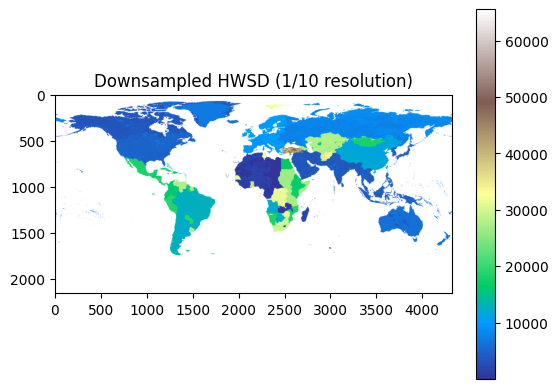

In [11]:
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

path = "Datasets\HWSD2_RASTER\HWSD2.bil"

with rasterio.open(path) as src:
    data = src.read(
        1,
        out_shape=(
            1,
            int(src.height / 10),  # reduce resolution by factor of 10
            int(src.width / 10)
        ),
        resampling=Resampling.bilinear
    )

plt.imshow(data, cmap='terrain')
plt.title("Downsampled HWSD (1/10 resolution)")
plt.colorbar()
plt.show()


Clip the worldwide datasets to the algeria and tunisia zones

Check the CRS of each file (they have to be the same)

In [12]:
with rasterio.open(path) as src:
    print("Raster CRS:", src.crs)

Raster CRS: OGC:CRS84


In [14]:
import geopandas as gpd

shapefile_path = "Datasets\gadm41_DZA_0.shp"

gdf = gpd.read_file(shapefile_path)
print("Shapefile CRS:", gdf.crs)


Shapefile CRS: EPSG:4326


In [19]:
gdf = gdf.to_crs(src.crs)  # src.crs is the raster CRS
gdf_T=gdf.to_crs(src.crs)

In [20]:
print("Shapefile CRS after reproject:", gdf.crs)
print("Raster CRS:", src.crs)

Shapefile CRS after reproject: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Raster CRS: OGC:CRS84


In [21]:
gdf.to_file("Datasets/boundaries/algeria_reprojected.shp")
gdf_T.to_file("Datasets/boundaries/tunisia_reprojected.shp")

In [22]:
import geopandas as gpd

alg = gpd.read_file(r"Datasets\boundaries\algeria_reprojected.shp")
tun = gpd.read_file(r"Datasets\boundaries\tunisia_reprojected.shp")

# Combine them
combined = alg._append(tun)

# Save merged shapefile
combined.to_file("Datasets/boundaries/algeria_tunisia.shp")


In [24]:
path = r"Datasets\boundaries\algeria_tunisia.shp"
gdf = gpd.read_file(path)
print(gdf.columns)

Index(['GID_0', 'COUNTRY', 'geometry'], dtype='object')


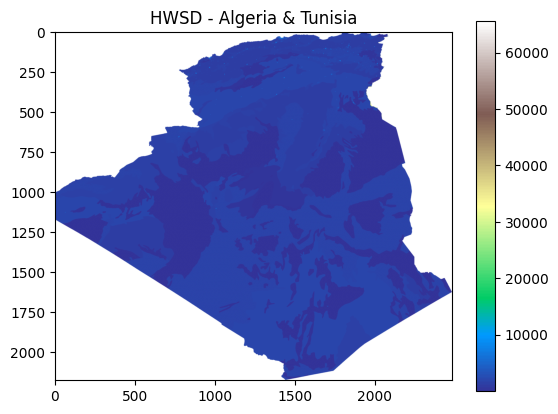

In [26]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

# === Paths ===
raster_path = "Datasets\HWSD2_RASTER\HWSD2.bil"
boundary_path = r"Datasets\boundaries\algeria_tunisia.shp"

# === Read the shapefile ===
countries = gpd.read_file(boundary_path)

# (Optional) keep only Algeria and Tunisia if the shapefile contains all Africa
countries = countries[countries['COUNTRY'].isin(['Algeria', 'Tunisia'])]

# === Read the raster ===
with rasterio.open(raster_path) as src:
    # Ensure same CRS
    countries = countries.to_crs(src.crs)
    
    # Clip raster with the country polygons
    out_image, out_transform = mask(src, countries.geometry, crop=True)
    out_meta = src.meta.copy()

# === Update metadata ===
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# === Save the clipped raster ===
with rasterio.open("Datasets\HWSD_Algeria_Tunisia.tif", "w", **out_meta) as dest:
    dest.write(out_image)

# === Visualize the clipped result ===
plt.imshow(out_image[0], cmap='terrain')
plt.title("HWSD - Algeria & Tunisia")
plt.colorbar()
plt.show()
